<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Before-your-start:" data-toc-modified-id="Before-your-start:-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Before your start:</a></span></li><li><span><a href="#Challenge-1---Import-and-Describe-the-Dataset" data-toc-modified-id="Challenge-1---Import-and-Describe-the-Dataset-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Challenge 1 - Import and Describe the Dataset</a></span><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Explore-the-dataset-with-mathematical-and-visualization-techniques.-What-do-you-find?" data-toc-modified-id="Explore-the-dataset-with-mathematical-and-visualization-techniques.-What-do-you-find?-2.0.0.1"><span class="toc-item-num">2.0.0.1&nbsp;&nbsp;</span>Explore the dataset with mathematical and visualization techniques. What do you find?</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Challenge-2---Data-Cleaning-and-Transformation" data-toc-modified-id="Challenge-2---Data-Cleaning-and-Transformation-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Challenge 2 - Data Cleaning and Transformation</a></span></li><li><span><a href="#Challenge-3---Data-Preprocessing" data-toc-modified-id="Challenge-3---Data-Preprocessing-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Challenge 3 - Data Preprocessing</a></span><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#We-will-use-the-StandardScaler-from-sklearn.preprocessing-and-scale-our-data.-Read-more-about-StandardScaler-here." data-toc-modified-id="We-will-use-the-StandardScaler-from-sklearn.preprocessing-and-scale-our-data.-Read-more-about-StandardScaler-here.-4.0.0.1"><span class="toc-item-num">4.0.0.1&nbsp;&nbsp;</span>We will use the <code>StandardScaler</code> from <code>sklearn.preprocessing</code> and scale our data. Read more about <code>StandardScaler</code> <a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler" target="_blank">here</a>.</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Challenge-4---Data-Clustering-with-K-Means" data-toc-modified-id="Challenge-4---Data-Clustering-with-K-Means-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Challenge 4 - Data Clustering with K-Means</a></span></li><li><span><a href="#Challenge-5---Data-Clustering-with-DBSCAN" data-toc-modified-id="Challenge-5---Data-Clustering-with-DBSCAN-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Challenge 5 - Data Clustering with DBSCAN</a></span></li><li><span><a href="#Challenge-6---Compare-K-Means-with-DBSCAN" data-toc-modified-id="Challenge-6---Compare-K-Means-with-DBSCAN-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Challenge 6 - Compare K-Means with DBSCAN</a></span></li><li><span><a href="#Bonus-Challenge-2---Changing-K-Means-Number-of-Clusters" data-toc-modified-id="Bonus-Challenge-2---Changing-K-Means-Number-of-Clusters-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Bonus Challenge 2 - Changing K-Means Number of Clusters</a></span></li><li><span><a href="#Bonus-Challenge-3---Changing-DBSCAN-eps-and-min_samples" data-toc-modified-id="Bonus-Challenge-3---Changing-DBSCAN-eps-and-min_samples-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Bonus Challenge 3 - Changing DBSCAN <code>eps</code> and <code>min_samples</code></a></span></li></ul></div>

# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [46]:
# Import your libraries:

%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings                                              
from sklearn.exceptions import DataConversionWarning          
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

# Challenge 1 - Import and Describe the Dataset

In this lab, we will use a dataset containing information about customer preferences. We will look at how much each customer spends in a year on each subcategory in the grocery store and try to find similarities using clustering.

The origin of the dataset is [here](https://archive.ics.uci.edu/ml/datasets/wholesale+customers).

In [47]:
# loading the data: Wholesale customers data

customers = pd.read_csv('../data/Wholesale customers data.csv')


#### Explore the dataset with mathematical and visualization techniques. What do you find?

Checklist:

* What does each column mean?
* Any categorical data to convert?
* Any missing data to remove?
* Column collinearity - any high correlations?
* Descriptive statistics - any outliers to remove?
* Column-wise data distribution - is the distribution skewed?
* Etc.

Additional info: Over a century ago, an Italian economist named Vilfredo Pareto discovered that roughly 20% of the customers account for 80% of the typical retail sales. This is called the [Pareto principle](https://en.wikipedia.org/wiki/Pareto_principle). Check if this dataset displays this characteristic.

   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185
Channel             int64
Region              int64
Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicassen          int64
dtype: object
Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64


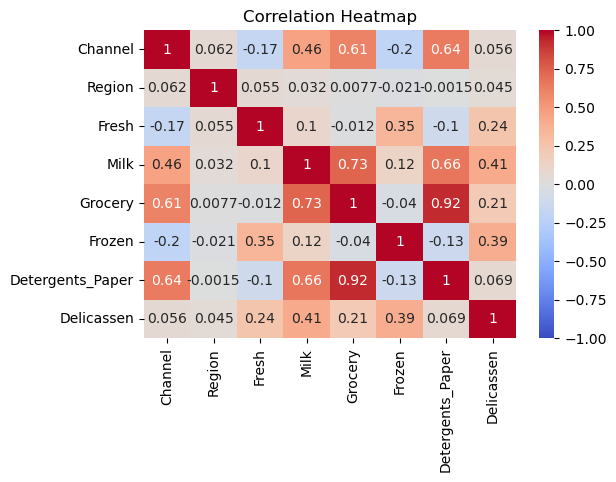

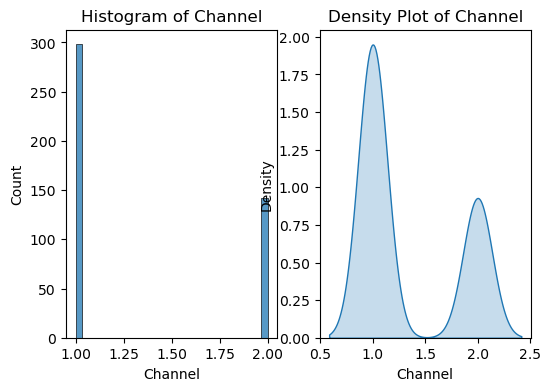

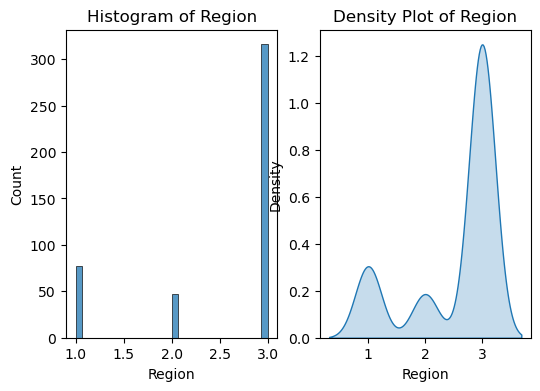

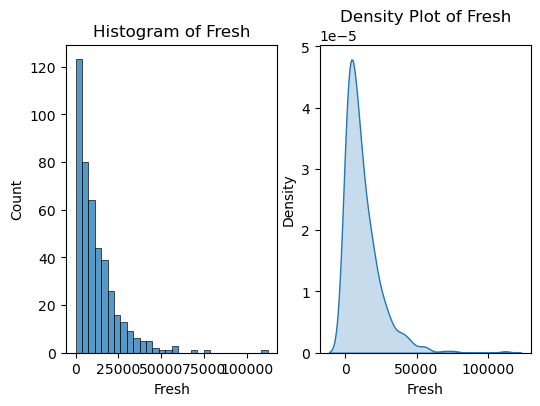

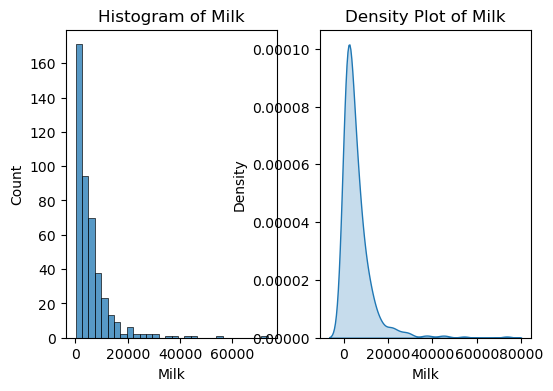

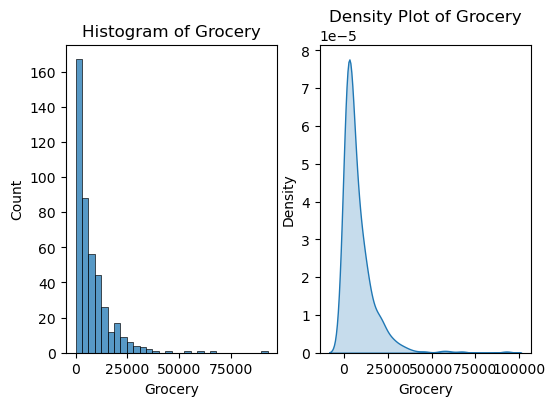

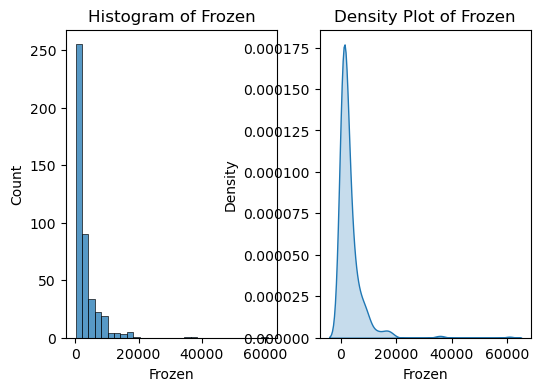

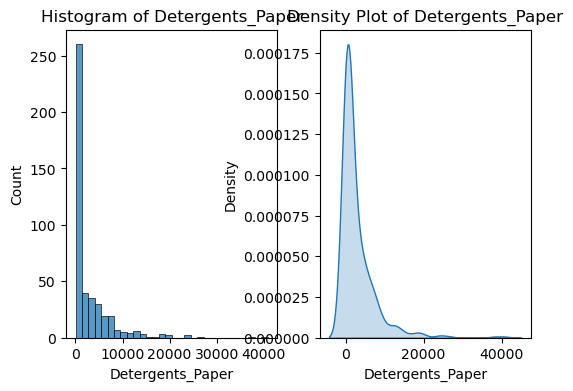

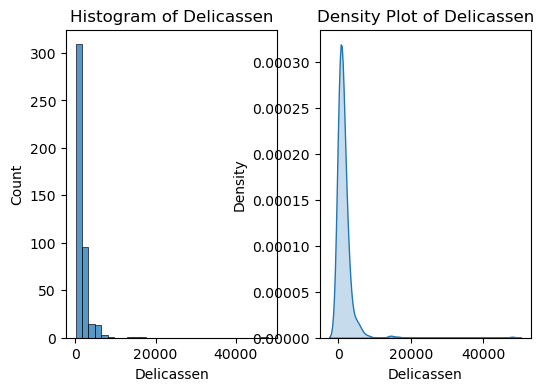

In [48]:
# Printing data head and types. No categorical data to convert (all ints)
print(customers.head())
print(customers.dtypes)

# Printing count of missing data. No missing values
print(customers.isnull().sum(axis = 0))

# Creating correlation matrix and plotting correlation graph. "Grocery" and "Detergents_Paper" are highly correlated
correlation_matrix = customers.corr()

plt.figure(figsize=(6, 4)) 
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

# Analyzing outliers with box plots proved not possible, as the columns have a wide range of values

# Showing column-wise data distribution with histogram and density plots. All of the data seems to be skewed in a direction
for column in customers.columns:
    plt.figure(figsize=(6, 4))
    
    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(customers[column], kde=False, bins=30)
    plt.title(f'Histogram of {column}')
    
    # Density Plot
    plt.subplot(1, 2, 2)
    sns.kdeplot(customers[column], fill=True)
    plt.title(f'Density Plot of {column}')
    
    plt.show()

# Checking Pareto principle is not possible, since we don't have information about individual customers


**Your observations here**

- ex.: Frozen, Grocery, Milk and Detergents Paper have a high...
- ...



# Challenge 2 - Data Cleaning and Transformation

If your conclusion from the previous challenge is the data need cleaning/transformation, do it in the cells below. However, if your conclusion is the data need not be cleaned or transformed, feel free to skip this challenge. But if you do choose the latter, please provide rationale.

In [49]:
# Data does not need to be cleaned, since all values are numerical and we have no missing values. Data needs to be standardised, but this is done in the next step

**Your comment here**

-  ...
-  ...

# Challenge 3 - Data Preprocessing

One problem with the dataset is the value ranges are remarkably different across various categories (e.g. `Fresh` and `Grocery` compared to `Detergents_Paper` and `Delicassen`). If you made this observation in the first challenge, you've done a great job! This means you not only completed the bonus questions in the previous Supervised Learning lab but also researched deep into [*feature scaling*](https://en.wikipedia.org/wiki/Feature_scaling). Keep on the good work!

Diverse value ranges in different features could cause issues in our clustering. The way to reduce the problem is through feature scaling. We'll use this technique again with this dataset.

#### We will use the `StandardScaler` from `sklearn.preprocessing` and scale our data. Read more about `StandardScaler` [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler).

*After scaling your data, assign the transformed data to a new variable `customers_scale`.*

In [50]:
from sklearn.preprocessing import StandardScaler

# Select the columns to be scaled (all except Channel and Region since they are categorical)
categorical_columns = ['Channel', 'Region']
columns_to_scale = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the data
scaled = scaler.fit_transform(customers[columns_to_scale])

# Convert the scaled data back to a DataFrame
scaled_df = pd.DataFrame(scaled, columns = columns_to_scale)

# Add back the non-scaled columns to the scaled DataFrame
customers_scale = customers[categorical_columns].join(scaled_df)

# Print the scaled DataFrame
print(customers_scale.head())


   Channel  Region     Fresh      Milk   Grocery    Frozen  Detergents_Paper  \
0        2       3  0.052933  0.523568 -0.041115 -0.589367         -0.043569   
1        2       3 -0.391302  0.544458  0.170318 -0.270136          0.086407   
2        2       3 -0.447029  0.408538 -0.028157 -0.137536          0.133232   
3        1       3  0.100111 -0.624020 -0.392977  0.687144         -0.498588   
4        2       3  0.840239 -0.052396 -0.079356  0.173859         -0.231918   

   Delicassen  
0   -0.066339  
1    0.089151  
2    2.243293  
3    0.093411  
4    1.299347  


# Challenge 4 - Data Clustering with K-Means

Now let's cluster the data with K-Means first. Initiate the K-Means model, then fit your scaled data. In the data returned from the `.fit` method, there is an attribute called `labels_` which is the cluster number assigned to each data record. What you can do is to assign these labels back to `customers` in a new column called `customers['labels']`. Then you'll see the cluster results of the original data.

In [51]:
from sklearn.cluster import KMeans

### Looking to the elbow we can choose 2 like the correct number of clusters

In [52]:
kmeans_2 = KMeans(n_clusters=2).fit(customers_scale)

labels = kmeans_2.predict(customers_scale)

clusters = kmeans_2.labels_.tolist()

c:\Users\katha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [53]:
customers['Labels'] = clusters

Count the values in `labels`.

In [39]:
customers["Labels"].value_counts()

Labels
0    439
1      1
Name: count, dtype: int64

# Challenge 5 - Data Clustering with DBSCAN

Now let's cluster the data using DBSCAN. Use `DBSCAN(eps=0.5)` to initiate the model, then fit your scaled data. In the data returned from the `.fit` method, assign the `labels_` back to `customers['labels_DBSCAN']`. Now your original data have two labels, one from K-Means and the other from DBSCAN.

In [54]:
from sklearn.cluster import DBSCAN 

# Initialize DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)

# Fit the model
labels_DBSCAN = dbscan.fit_predict(customers_scale)

# Get cluster labels and convert to list
DBSCAN_clusters = dbscan.labels_.tolist()

# Assign list to new column
customers['Labels_DBSCAN'] = DBSCAN_clusters


Count the values in `labels_DBSCAN`.

In [55]:
customers["Labels_DBSCAN"].value_counts()

Labels_DBSCAN
-1    255
 1    130
 5     22
 4      7
 6      6
 0      5
 3      5
 2      5
 7      5
Name: count, dtype: int64

# Challenge 6 - Compare K-Means with DBSCAN

Now we want to visually compare how K-Means and DBSCAN have clustered our data. We will create scatter plots for several columns. For each of the following column pairs, plot a scatter plot using `labels` and another using `labels_DBSCAN`. Put them side by side to compare. Which clustering algorithm makes better sense?

Columns to visualize:

* `Detergents_Paper` as X and `Milk` as y
* `Grocery` as X and `Fresh` as y
* `Frozen` as X and `Delicassen` as y

Visualize `Detergents_Paper` as X and `Milk` as y by `labels` and `labels_DBSCAN` respectively

In [62]:
def plot(x,y,hue,title):
    sns.scatterplot(x=x, 
                    y=y,
                    hue=hue)
    #plt.title('Detergents Paper vs Milk ')
    #return plt.show();
    plt.title(title)
    plt.legend(title='Cluster')
    plt.grid(True)
    return plt.show()

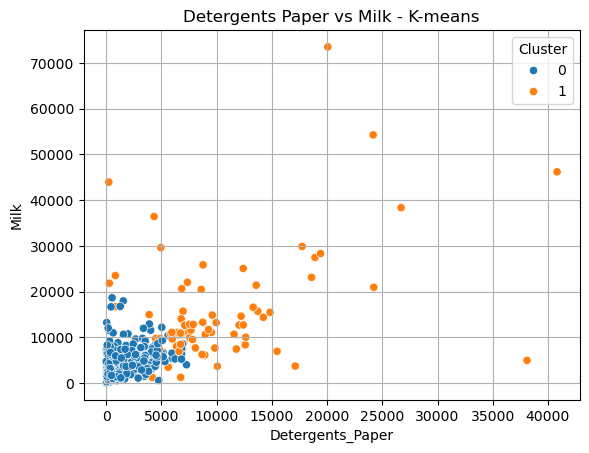

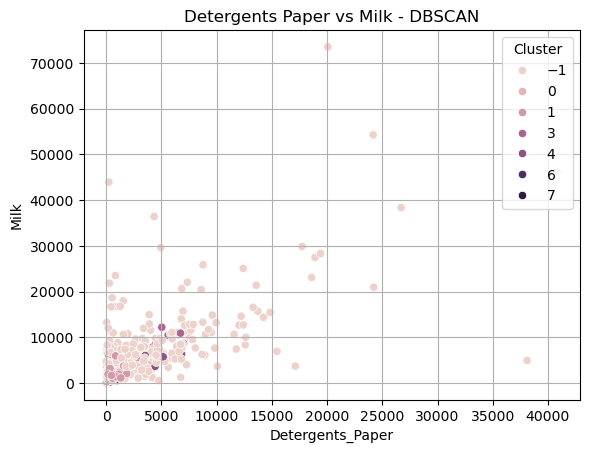

In [64]:
plot (x = customers["Detergents_Paper"], y = customers["Milk"], hue = customers["Labels"], title = "Detergents Paper vs Milk - K-means",)
plot (x = customers["Detergents_Paper"], y = customers["Milk"], hue = customers["Labels_DBSCAN"], title = "Detergents Paper vs Milk - DBSCAN",)

Visualize `Grocery` as X and `Fresh` as y by `labels` and `labels_DBSCAN` respectively

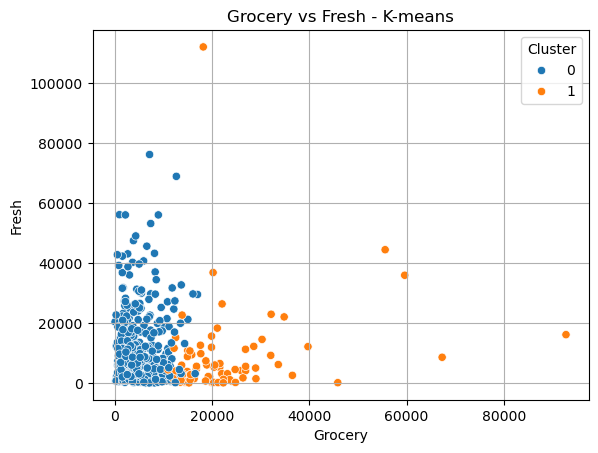

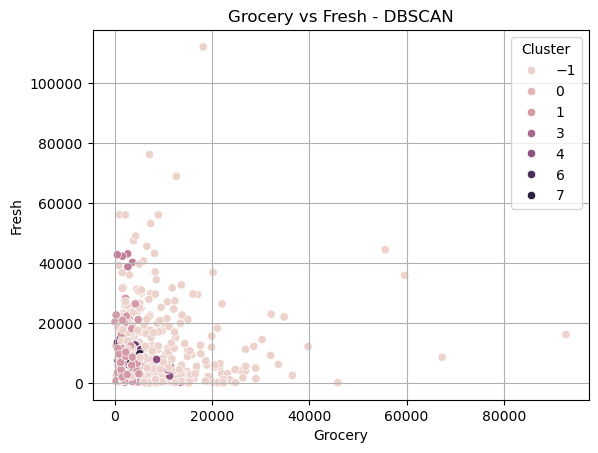

In [65]:
plot (x = customers["Grocery"], y = customers["Fresh"], hue = customers["Labels"], title = "Grocery vs Fresh - K-means",)
plot (x = customers["Grocery"], y = customers["Fresh"], hue = customers["Labels_DBSCAN"], title = "Grocery vs Fresh - DBSCAN",)

Visualize `Frozen` as X and `Delicassen` as y by `labels` and `labels_DBSCAN` respectively

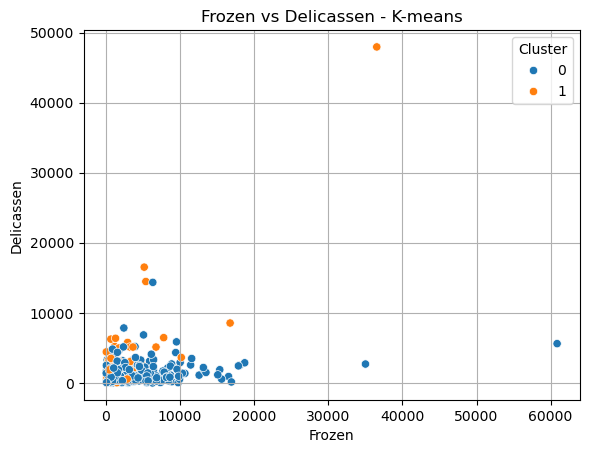

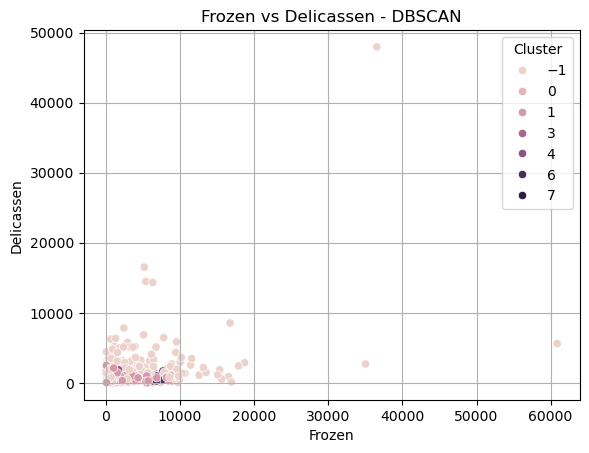

In [66]:
plot (x = customers["Frozen"], y = customers["Delicassen"], hue = customers["Labels"], title = "Frozen vs Delicassen - K-means",)
plot (x = customers["Frozen"], y = customers["Delicassen"], hue = customers["Labels_DBSCAN"], title = "Frozen vs Delicassen - DBSCAN",)

Let's use a groupby to see how the mean differs between the groups. Group `customers` by `labels` and `labels_DBSCAN` respectively and compute the means for all columns.

In [69]:
# Group by KMeans_Labels and calculate means
kmeans_means = customers.groupby('Labels').mean()

print("KMeans Cluster Means:")
print(kmeans_means)

# Group by DBSCAN_Labels and calculate means
dbscan_means = customers.groupby('Labels_DBSCAN').mean()

print("DBSCAN Cluster Means:")
print(dbscan_means)

KMeans Cluster Means:
         Channel    Region         Fresh          Milk       Grocery  \
Labels                                                                 
0       1.197802  2.554945  12638.673077   3718.579670   4739.035714   
1       1.921053  2.486842   8942.815789  15747.289474  23336.223684   

             Frozen  Detergents_Paper   Delicassen  Labels_DBSCAN  
Labels                                                             
0       3203.664835       1319.989011  1230.747253       0.486264  
1       2441.000000      10360.276316  2933.565789      -0.894737  
DBSCAN Cluster Means:
                Channel   Region         Fresh          Milk       Grocery  \
Labels_DBSCAN                                                                
-1             1.490196  2.45098  13729.564706   8359.886275  11484.364706   
 0             2.000000  3.00000  11401.000000   3536.200000   6729.000000   
 1             1.000000  3.00000   9128.823077   1862.438462   2423.530769   
 2   

Which algorithm appears to perform better?

**Your observations here**

- The K-Means model only determined 2 clusters, while the DBSCAN made 9 clusters
- In the visualization, it seemed to make more sense to only divide the data into two clusters, rather than the 9 clusters of the DBSCAN model
- However, this could be due to the 2D visualisation and a look at a 3D graph might change this conclusion
- In the grouped means, the means of some columns for the DBSCAN clusters are not very different from the other clusters, making it seem like the values should belong together instead of being in a different cluster
- Thus, the K-Means algorithm seemed to have performed better in this case

# Bonus Challenge 2 - Changing K-Means Number of Clusters

As we mentioned earlier, we don't need to worry about the number of clusters with DBSCAN because it automatically decides that based on the parameters we send to it. But with K-Means, we have to supply the `n_clusters` param (if you don't supply `n_clusters`, the algorithm will use `8` by default). You need to know that the optimal number of clusters differs case by case based on the dataset. K-Means can perform badly if the wrong number of clusters is used.

In advanced machine learning, data scientists try different numbers of clusters and evaluate the results with statistical measures (read [here](https://en.wikipedia.org/wiki/Cluster_analysis#External_evaluation)). We are not using statistical measures today but we'll use our eyes instead. In the cells below, experiment with different number of clusters and visualize with scatter plots. What number of clusters seems to work best for K-Means?

In [41]:
# Your code here:

**Your comment here**

- 

# Bonus Challenge 3 - Changing DBSCAN `eps` and `min_samples`

Experiment changing the `eps` and `min_samples` params for DBSCAN. See how the results differ with scatter plot visualization.

In [ ]:
# Your code here

**Your comment here**

- 